In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [10]:
# Load dataset
data_path = 'cybersecurity_dataset.csv'
df = pd.read_csv(data_path)

In [11]:
# Data exploration
print("Dataset Info:")
print(df.info())
print("\nPreview of the dataset:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Event ID             20000 non-null  object
 1   Timestamp            20000 non-null  object
 2   Source IP            20000 non-null  object
 3   Destination IP       20000 non-null  object
 4   User Agent           20000 non-null  object
 5   Attack Type          20000 non-null  object
 6   Attack Severity      20000 non-null  object
 7   Data Exfiltrated     20000 non-null  bool  
 8   Threat Intelligence  20000 non-null  object
 9   Response Action      20000 non-null  object
dtypes: bool(1), object(9)
memory usage: 1.4+ MB
None

Preview of the dataset:
                               Event ID            Timestamp       Source IP  \
0  2019969e-ecfa-41c4-b681-9b684bc3b3bf  2020-02-07 23:46:57   219.80.193.15   
1  1668e954-781f-4731-94dc-24218b983ba1  2021-05-2

In [12]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Event ID               0
Timestamp              0
Source IP              0
Destination IP         0
User Agent             0
Attack Type            0
Attack Severity        0
Data Exfiltrated       0
Threat Intelligence    0
Response Action        0
dtype: int64


**1. Univariate analysis: Distribution of attack types:**

**Distribution of Attack Types**

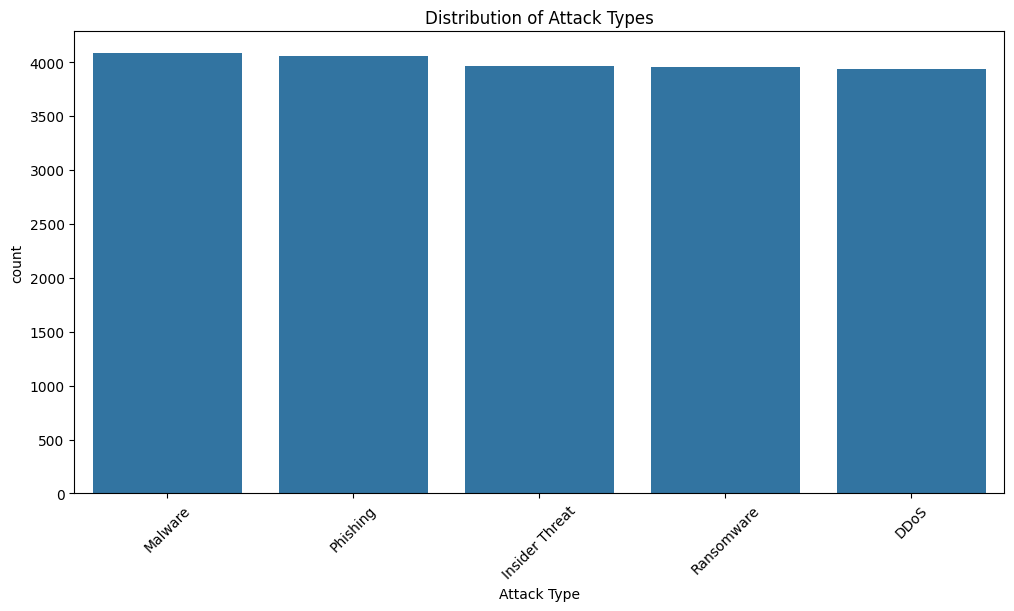

In [14]:
# Distribution of attack types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Attack Type', order=df['Attack Type'].value_counts().index)
plt.title('Distribution of Attack Types')
plt.xticks(rotation=45)
plt.savefig('../attack_type_distribution.png')
plt.show()


**Distribution of Attack Severity**

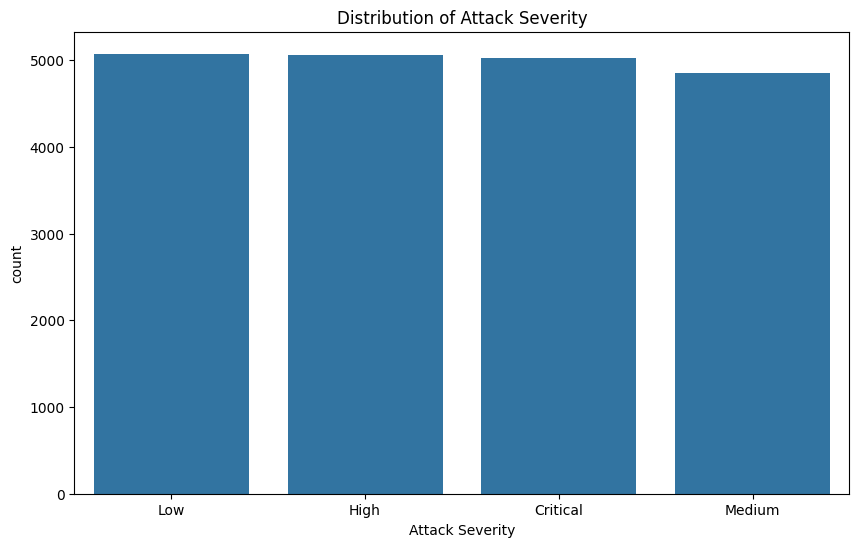

In [22]:
# Plot the distribution of Attack Severity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attack Severity', order=df['Attack Severity'].value_counts().index)
plt.title('Distribution of Attack Severity')
plt.show()


**Frequency of Response Actions**

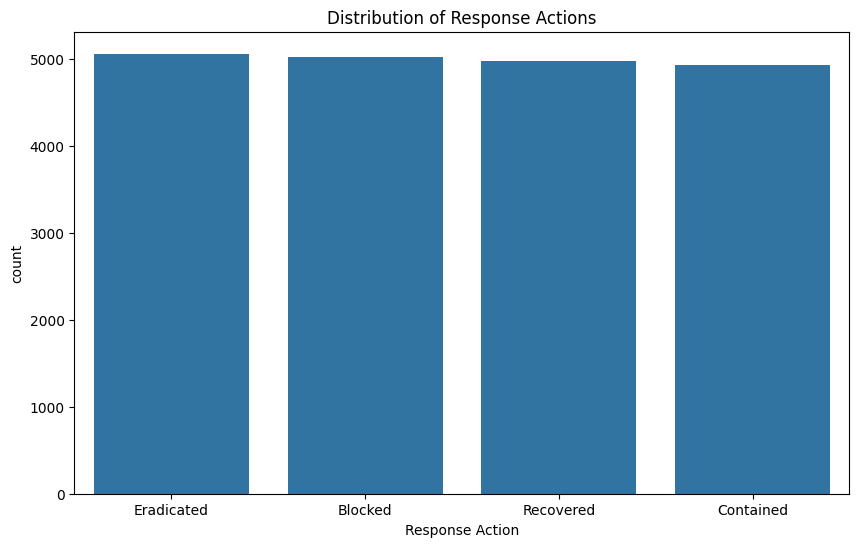

In [23]:
# Plot the distribution of Response Actions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Response Action', order=df['Response Action'].value_counts().index)
plt.title('Distribution of Response Actions')
plt.show()


**2. Multivariate Analysis:**

Relationship Between Attack Type and Severity

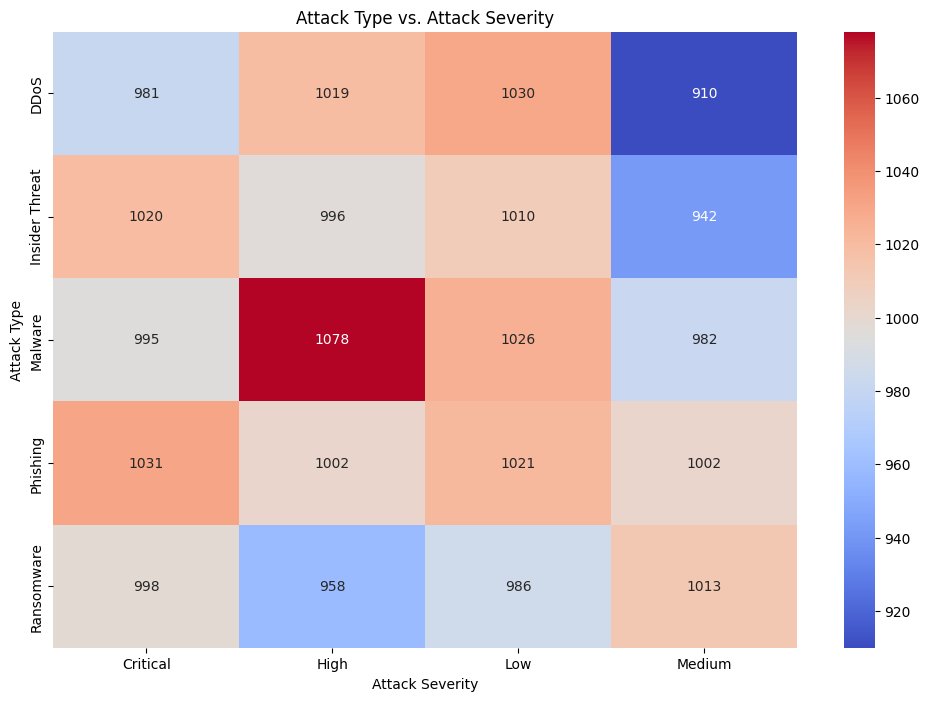

In [25]:
# Group by Attack Type and Severity
severity_counts = df.groupby(['Attack Type', 'Attack Severity']).size().unstack()

# Heatmap of the relationship
plt.figure(figsize=(12, 8))
sns.heatmap(severity_counts, annot=True, cmap='coolwarm', fmt='d')
plt.title('Attack Type vs. Attack Severity')
plt.show()

**Data Exfiltration by Attack Type:**

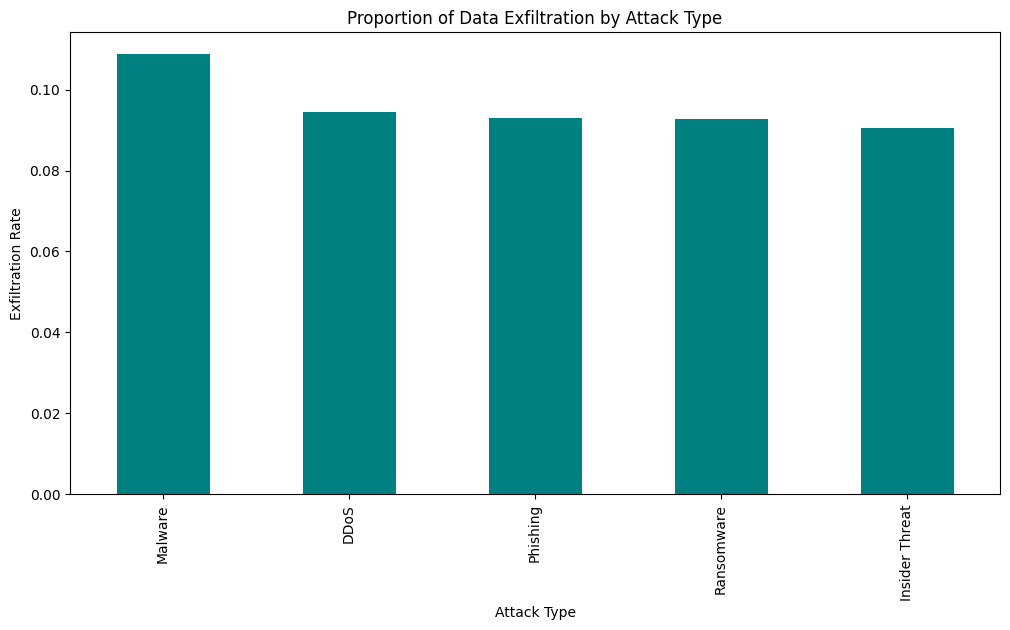

In [26]:
# Proportion of Data Exfiltration by Attack Type
exfiltration_rates = df.groupby('Attack Type')['Data Exfiltrated'].mean()

# Plotting
plt.figure(figsize=(12, 6))
exfiltration_rates.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Proportion of Data Exfiltration by Attack Type')
plt.ylabel('Exfiltration Rate')
plt.show()


**3. Correlation Analysis:**

**Correlation Between Severity and Exfiltration**

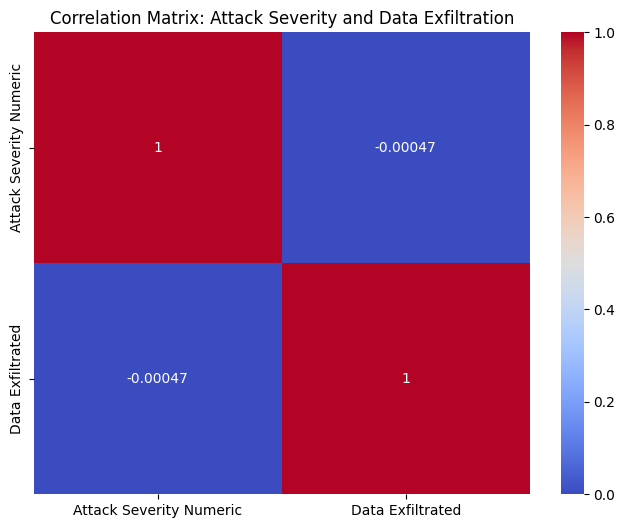

In [27]:
# Map categorical severity to numeric values
df['Attack Severity Numeric'] = df['Attack Severity'].map({'Critical': 3, 'High': 2, 'Medium': 1})

# Calculate correlation
correlation = df[['Attack Severity Numeric', 'Data Exfiltrated']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Attack Severity and Data Exfiltration')
plt.show()


**4. Interactive Visualizations with Plotly:**
Bar Chart: Attack Types by Severity

In [28]:
import plotly.express as px

fig = px.bar(df, x='Attack Type', color='Attack Severity', title='Attack Types by Severity')
fig.show()


**Stacked Bar Chart: Response Actions by Attack Type**

In [29]:
fig = px.bar(df, x='Attack Type', color='Response Action', title='Response Actions by Attack Type', barmode='stack')
fig.show()
